In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
torch.__version__, torchvision.__version__

('2.1.0+cu121', '0.16.0+cu121')

In [ ]:
#setup
train_data = datasets.FashionMNIST(
    root = 'data',    #where to download daat to
    train = True,     #get training data
    download = True,    #download data if doesn't exist on disk
    transform = ToTensor(),   #convert PIL images to Torch tensors
    target_transform = None
)

#setup test data
test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,    #get test data
    download = True,
    transform = ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 14858723.50it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 278241.39it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5015220.66it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18144770.58it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
#first training sample
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
image.shape     #1 color channel (grayscale), height and width each 28 pixels
#color channel = 3 would be rgb
#this order is CHW (color channel, height, width)
#alternate is HWC
#can include n as number of images in a batch: NCHW or NHWC

torch.Size([1, 28, 28])

In [ ]:
#how many samples
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
#classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


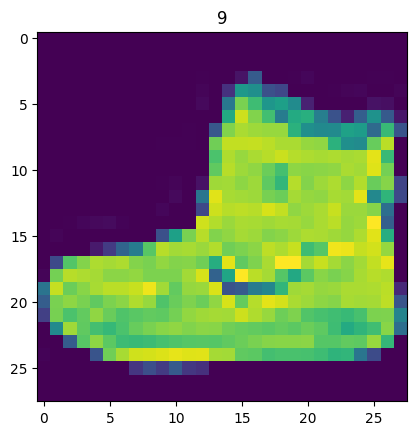

In [ ]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

Text(0.5, 1.0, '9')

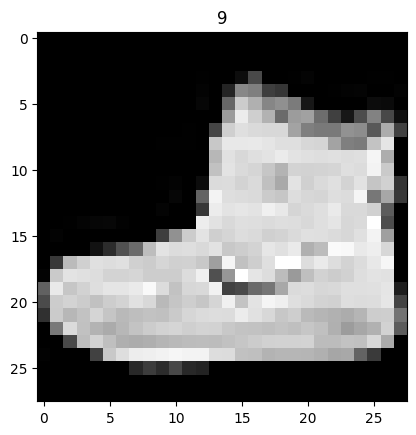

In [ ]:
#grayscale
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(label)

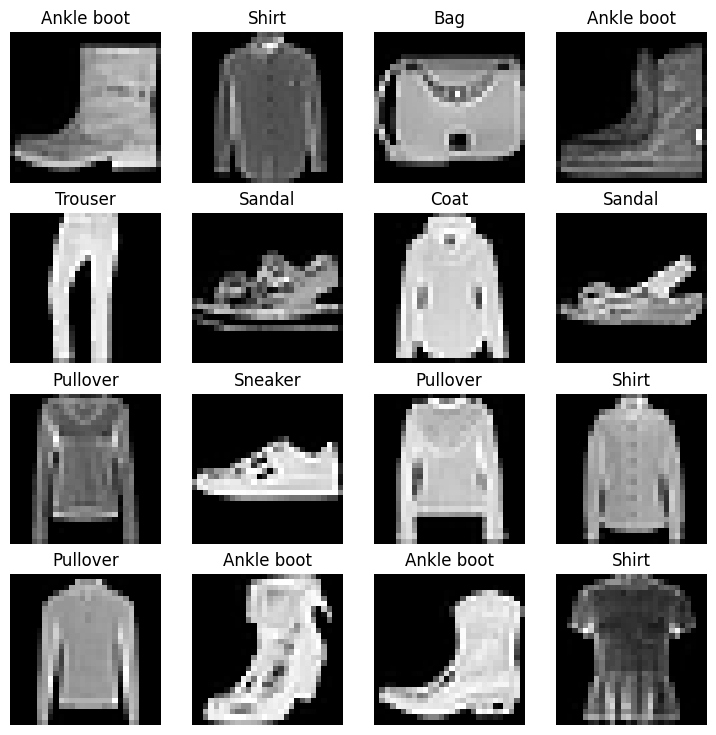

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize = (9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap = 'gray')
  plt.title(class_names[label])
  plt.axis(False);

In [ ]:
#set batch size to have backpropogation happen on subsets of full data (often 32)
#computationally efficient
#batch size hyperparameter is usually a power of 2

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32

#turn datasets into iterables(batches)
train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,    #samples per batch
                              shuffle = True              #shuffle data each epoch
                              )

test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False    #no need for test data
)

print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Lendth of train DL: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"len of test DL: {len(test_dataloader)}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c73288a13f0>, <torch.utils.data.dataloader.DataLoader object at 0x7c73288a1810>)
Lendth of train DL: 1875 batches of 32
len of test DL: 313


In [ ]:
#whats inside
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

img size: torch.Size([1, 28, 28])
label: 6, label size : torch.Size([])


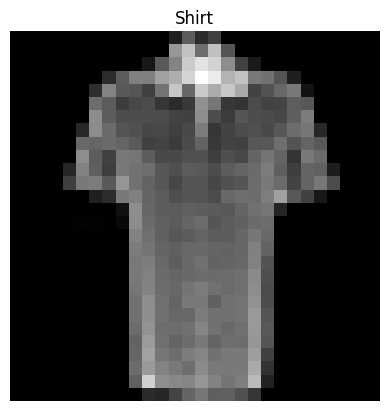

In [ ]:
#show sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(class_names[label])
plt.axis('Off')
print(f"img size: {img.shape}")
print(f"label: {label}, label size : {label.shape}")

In [ ]:
#nn.Flatten() compresses tensor into single vector
#baseline model
flatten_model = nn.Flatten()

#single samp
x = train_features_batch[0]

#flatten
output = flatten_model(x) #forward pass

print(f"shape before flat: {x.shape} ->[color_channels, height, width]")
print(f"shape after: {output.shape} -> [color_channels, height*width]")


shape before flat: torch.Size([1, 28, 28]) ->[color_channels, height, width]
shape after: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
class FashionMNISTModelv0(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),    #get inputs into vector form
        nn.Linear(input_shape, hidden_units),
        nn.Linear(hidden_units, output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModelv0(input_shape=784, #one per pixel 28*28
                              hidden_units = 10,
                              output_shape = len(class_names)
                              )

model_0.to('cpu')

FashionMNISTModelv0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('already exists')
else:
  print('downloading')
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

downloading


In [ ]:
#from helper_functions import accuracy_fn #could use torchmetrics.accuracy
!pip -q install torchmetrics
import torchmetrics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 4.2 MB/s eta 0:00:00


In [ ]:
device = 'cpu'
acc_fn = torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)*100

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(), lr = 0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
#tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n---")
  #train
  train_loss = 0
  #batch loop
  for batch, (X,y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss #accumulate loss per epoch
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch %400 == 0:
      print(f"looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")

  train_loss/=len(train_dataloader)     #avg loss per batch per epoch

  #testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      test_pred = model_0(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += acc_fn(y, test_pred.argmax(dim = 1))

    test_loss/= len(test_dataloader)
    test_acc/= len(test_dataloader)

  print(f"\ntrain loss: {train_loss:.5f} | test_loss: {test_loss:.5f} | test acc: {test_acc:.2f}% \n")

#calc train time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(train_time_start_on_cpu,
                                            train_time_end_on_cpu,
                                            device = next(model_0.parameters()).device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
---
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

train loss: 0.59039 | test_loss: 0.50954 | test acc: 82.04% 

epoch: 1
---
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

train loss: 0.47633 | test_loss: 0.47989 | test acc: 83.20% 

epoch: 2
---
looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

train loss: 0.45503 | test_loss: 0.47664 | test acc: 83.43% 

Train time on cpu: 47.885 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,                   #pytorch model
               data_loader: torch.utils.data.DataLoader,  #target dataset
               loss_fn: torch.nn.Module,
               acc_fn,
               device: torch.device = device):
  #returns dict of model predictions results
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc+= acc_fn(y, y_pred.argmax(dim = 1))

    #scale loss and acc to find avg per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name': model.__class__.__name__,
          'model_loss': loss.item(),
          'model_acc': acc.item()}

In [ ]:
#calc model_0 results
model_0_results = eval_model(model = model_0, data_loader = test_dataloader,
                             loss_fn = loss_fn, acc_fn = acc_fn)
model_0_results

{'model_name': 'FashionMNISTModelv0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42652130126953}

In [ ]:
#non lin model
class FashionMNISTModelv1(nn.Module):
  def __init__(self, input_shape: int, hidden_units:int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, hidden_units),
        nn.ReLU(),
        nn.Linear(hidden_units, output_shape),
        nn.ReLU()
    )

  def forward(self, x:torch.Tensor):
    return self.layer_stack(x)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
acc_fn = torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)*100

In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelv1(input_shape=784, hidden_units = 10,
                              output_shape=len(class_names)).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.1)

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               acc_fn,
               device: torch.device = device
               ):
  train_loss, train_acc = 0, 0
  model.to(device)
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)

    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += acc_fn(y, y_pred.argmax(dim = 1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"train loss:{train_loss:.5f} | train_acc: {train_acc:.4f}")

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              acc_fn,
              device: torch.device = device):
  test_loss, test_acc = 0, 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss = loss_fn(test_pred, y)
      test_loss += loss
      test_acc += acc_fn(y, test_pred.argmax(dim = 1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"test loss: {test_loss:.5f} | test_acc: {test_acc:.2f}")


In [ ]:
torch.manual_seed(42)
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n---")
  train_step(data_loader = train_dataloader,
             model = model_1,
             loss_fn = loss_fn,
             optimizer = optimizer,
             acc_fn = acc_fn)
  test_step(data_loader = test_dataloader,
            model = model_1,
            loss_fn = loss_fn,
            acc_fn = acc_fn)

  train_time_end_on_gpu = timer()
  total_train_time_model_1 = print_train_time(train_time_start_on_gpu,
                                              train_time_end_on_gpu,
                                              device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
---
train loss:1.09199 | train_acc: 61.3433
test loss: 0.00321 | test_acc: 65.00
Train time on cuda: 31.423 seconds
epoch: 1
---
train loss:0.78101 | train_acc: 71.9283
test loss: 0.00229 | test_acc: 73.91
Train time on cuda: 51.471 seconds
epoch: 2
---
train loss:0.67027 | train_acc: 75.9367
test loss: 0.00229 | test_acc: 75.02
Train time on cuda: 77.762 seconds


In [ ]:
torch.manual_seed(42)

model_1_results = eval_model(model = model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             acc_fn = acc_fn)
model_1_results
#errors bc eval_model() not device agnostic
#went back and added device input to eval function

{'model_name': 'FashionMNISTModelv1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996612548828}

In [ ]:
#baseline
model_0_results

{'model_name': 'FashionMNISTModelv0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42652130126953}

In [ ]:
#convolutional neural network is good for pattern recognition with visual data
#input layer, [convolutional layer, activation layer, pooling layer], output layer

In [ ]:
#models for diff problems
"""
Structured data (Excel spreadsheets, row and column data)
  Gradient boosted models, Random Forests, XGBoost
    sklearn.ensemble, XGBoost library
Unstructured data (images, audio, language)
  Convolutional Neural Networks, Transformers
    torchvision.models, HuggingFace Transformers
"""

'\nStructured data (Excel spreadsheets, row and column data)\t\n  Gradient boosted models, Random Forests, XGBoost\t\n    sklearn.ensemble, XGBoost library\nUnstructured data (images, audio, language)\t\n  Convolutional Neural Networks, Transformers\t\n    torchvision.models, HuggingFace Transformers\n'

In [ ]:
#convolutional NN
class FashionMNISTModelv2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size = 3,     #size of square going over image
                  stride = 1,          #default
                  padding = 1),       #options: 'valid' (no padding), 'same' (out has same shape as in) or int for specific val
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels=hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride =2)   #default stride val is same as kernel size
    )

    self.block2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,     #each layer compresses and changes shape of our input data
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    x = self.block1(x)
    x = self.block2(x)
    x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelv2(input_shape=1,
                              hidden_units = 10,
                              output_shape = len(class_names)).to(device)
model_2

FashionMNISTModelv2(
  (block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#2d here stands for 2 dim data. text would be 1d, 3d obj would be 3d

In [ ]:
torch.manual_seed(42)
#samp batch of rand num with same size as img batch
images = torch.randn(size = (32, 3, 64, 64))    #[batch size, color channs, height, width]
test_image = images[0]
print(f"img batch shape: {images.shape}")
print(f"single img shape: {test_image.shape}")
print(f"single img pixel val:\n{test_image}")

img batch shape: torch.Size([32, 3, 64, 64])
single img shape: torch.Size([3, 64, 64])
single img pixel val:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

       

In [ ]:
#conv nn variable info
"""
kernel_size (int or tuple) - Size of the convolving kernel/filter.
stride (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.
padding (int, tuple, str) - Padding added to all four sides of input. Default: 0.
"""

'\nkernel_size (int or tuple) - Size of the convolving kernel/filter.\nstride (int or tuple, optional) - How big of a step the convolving kernel takes at a time. Default: 1.\npadding (int, tuple, str) - Padding added to all four sides of input. Default: 0.\n'

In [ ]:
torch.manual_seed(42)
#create conv layer
conv_layer = nn.Conv2d(in_channels = 3,
                       out_channels = 10,
                       kernel_size = 3,
                       stride = 1,
                       padding = 0)

conv_layer(test_image)

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [ ]:
conv_layer(test_image).shape

torch.Size([10, 62, 62])

In [ ]:
torch.manual_seed(42)

#mess with values
conv_layer_2 = nn.Conv2d(in_channels = 3,
                         out_channels= 10,
                         kernel_size = (5, 5),
                         stride = 2,
                         padding = 0)

conv_layer_2(test_image).shape

torch.Size([10, 30, 30])

In [ ]:
#check internal params
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [ ]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


In [ ]:
#playing with maxpool
print(f"test img original shape: {test_image.shape}")
print(f"test img w unsqueezed dim: {test_image.unsqueeze(dim =0).shape}")

max_pool_layer = nn.MaxPool2d(kernel_size =2)

test_image_through_conv = conv_layer(test_image)
print(f"shape after conv layer: {test_image_through_conv.shape}")
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"shape after conv layer and max pool: {test_image_through_conv_and_max_pool.shape}")

test img original shape: torch.Size([3, 64, 64])
test img w unsqueezed dim: torch.Size([1, 3, 64, 64])
shape after conv layer: torch.Size([10, 62, 62])
shape after conv layer and max pool: torch.Size([10, 31, 31])


In [ ]:
torch.manual_seed(42)

#try with rand tensor with smaller number of dims
rand_ten = torch.randn(size = (1,1,2,2))
print(f"rand tensor:\n{rand_ten}")
print(f"rand tensor shape: {rand_ten.shape}")

max_pool_layer = nn.MaxPool2d(kernel_size = 2)
max_pool_tensor = max_pool_layer(rand_ten)
print(f"\nmax pool tensor: \n{max_pool_tensor}")    #max val from rand tensor
print(f"max pool tensor shape: {max_pool_tensor.shape}")

rand tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
rand tensor shape: torch.Size([1, 1, 2, 2])

max pool tensor: 
tensor([[[[0.3367]]]])
max pool tensor shape: torch.Size([1, 1, 1, 1])


In [ ]:
#exercise with avgpool
torch.manual_seed(42)

rand_ten2 = torch.randn(size = (1,1,4,4))
print(f"rand tensor:\n{rand_ten2}")
print(f"rand tensor shape: {rand_ten2.shape}")

avg_pool_layer = nn.AvgPool2d(kernel_size =2)
avg_pool_tensor = avg_pool_layer(rand_ten2)
print(f"\nmax pool tensor: \n{avg_pool_tensor}")    #my guess is avg of 4*4 square from rand tensor
print(f"max pool tensor shape: {avg_pool_tensor.shape}")

rand tensor:
tensor([[[[ 1.9269,  1.4873,  0.9007, -2.1055],
          [ 0.6784, -1.2345, -0.0431, -1.6047],
          [-0.7521,  1.6487, -0.3925, -1.4036],
          [-0.7279, -0.5594, -0.7688,  0.7624]]]])
rand tensor shape: torch.Size([1, 1, 4, 4])

max pool tensor: 
tensor([[[[ 0.7145, -0.7131],
          [-0.0977, -0.4506]]]])
max pool tensor shape: torch.Size([1, 1, 2, 2])


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr = 0.1)

In [51]:
torch.manual_seed(42)

#measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"epoch: {epoch}\n---")
  train_step(data_loader= train_dataloader,
             model = model_2,
             loss_fn = loss_fn,
             optimizer = optimizer,
             acc_fn = acc_fn,
             device = device
             )
  test_step(data_loader = test_dataloader,
            model = model_2,
            loss_fn = loss_fn,
            acc_fn = acc_fn,
            device = device
            )
train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                            end = train_time_end_model_2,
                                            device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
---
train loss:0.58676 | train_acc: 78.7500
test loss: 0.00165 | test_acc: 86.32
epoch: 1
---
train loss:0.36153 | train_acc: 86.9100
test loss: 0.00150 | test_acc: 86.94
epoch: 2
---
train loss:0.32422 | train_acc: 88.2317
test loss: 0.00151 | test_acc: 88.26
Train time on cuda: 47.029 seconds


In [52]:
model_2_results = eval_model(model = model_2,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             acc_fn = acc_fn
                             )
model_2_results

{'model_name': 'FashionMNISTModelv2',
 'model_loss': 0.3178929388523102,
 'model_acc': 88.25878143310547}

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

In [54]:
#add train times
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelv0,0.476639,83.426521,47.884841
1,FashionMNISTModelv1,0.685001,75.019966,77.761865
2,FashionMNISTModelv2,0.317893,88.258781,47.029228


In [55]:
#generally training models has a performance-speed tradeoff

Text(0, 0.5, 'model')

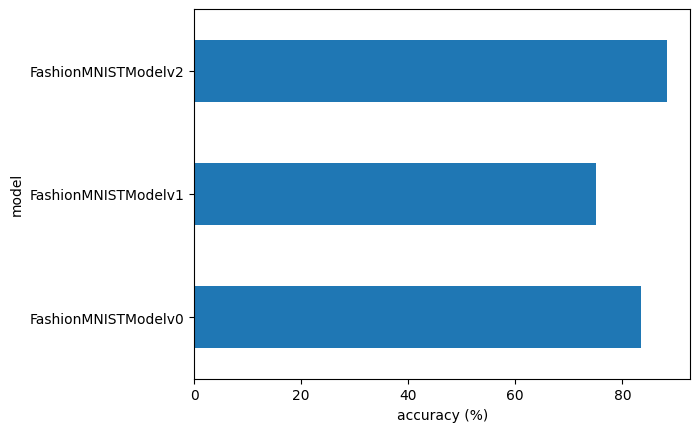

In [56]:
#visual
compare_results.set_index('model_name')['model_acc'].plot(kind = 'barh')
plt.xlabel('accuracy (%)')
plt.ylabel('model')

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim = 0).to(device)
      #forward pass
      pred_logit = model(sample)
      #turn logit to pred prob
      pred_prob = torch.softmax(pred_logit.squeeze(), dim = 0) #make sure this is done on logit dim

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [58]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k = 9):
  test_samples.append(sample)
  test_labels.append(label)

print(f"test sample img shape: {test_samples[0].shape}\n test samp label: {test_labels[0]}")
class_names[test_labels[0]]

test sample img shape: torch.Size([1, 28, 28])
 test samp label: 5


'Sandal'

In [59]:
#make preds on test samples with model 2
pred_probs = make_predictions(model = model_2, data = test_samples)

pred_probs[:2]

tensor([[8.8920e-08, 4.2883e-08, 4.4184e-08, 3.7697e-07, 4.0258e-08, 9.9991e-01,
         4.4096e-07, 1.1125e-05, 4.3652e-05, 3.6662e-05],
        [7.9155e-02, 4.3408e-01, 1.1230e-03, 2.0563e-01, 6.9116e-02, 1.7698e-04,
         2.0852e-01, 3.8845e-04, 1.1134e-03, 6.9328e-04]])

In [60]:
#turn probs into labels with argmax()
pred_classes = pred_probs.argmax(dim = 1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

In [61]:
#same format as test labels?
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 1, 7, 4, 3, 0, 4, 7, 1]))

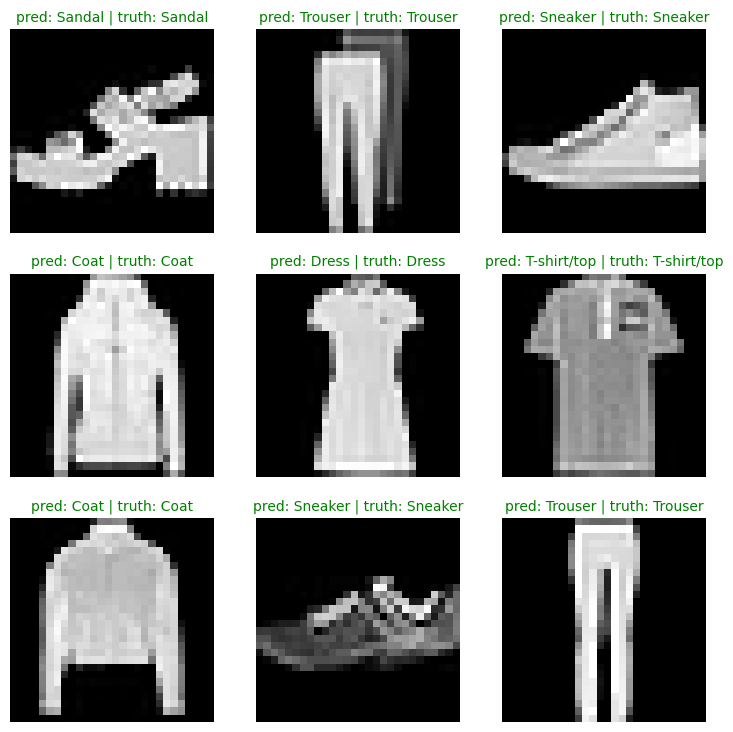

In [62]:
#plot preds
plt.figure(figsize = (9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  #plot target img
  plt.imshow(sample.squeeze(), cmap = 'gray')

  #find pred label
  pred_label  = class_names[pred_classes[i]]
  #truth label
  truth_label = class_names[test_labels[i]]
  title_text = f"pred: {pred_label} | truth: {truth_label}"

  #check for equality
  if pred_label == truth_label:
    plt.title(title_text, fontsize = 10, c = 'g')
  else:
    plt.title(title_text, fontsize = 10, c = 'r')
  plt.axis(False)

In [64]:
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc = 'Making Predictions'):
    X, y = X.to(device), y.to(device)
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit, dim = 1).argmax(dim = 1)
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)

Making Predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
# try:
#   import torchmetrics, mlxtend
#   print(f"mlextend version: {mlxtend.__version__}")
#   assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend vers should be 0.19.0 or higher"
# except:
#   !pip install -q torchmetrics -U mlxtend
#   import torchmetrics, mlxtend
#   print(f"mlxtend version: {mlxtend.__version__}")

In [66]:
import mlxtend
print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.22.0


In [67]:
assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend vers should be 0.19.0 or higher"


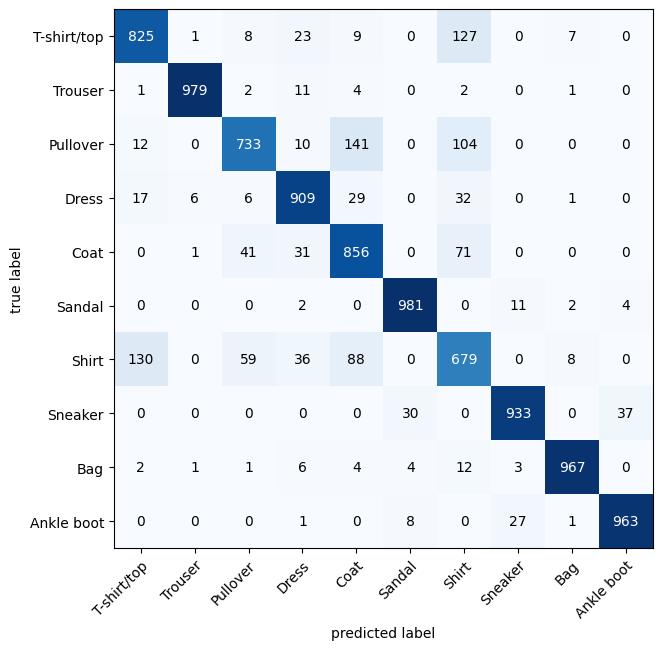

In [68]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_names), task = 'multiclass')
confmat_tensor = confmat(preds =y_pred_tensor,
                         target = test_data.targets)

fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),       #matplotlib wants numpy
    class_names = class_names,                #turn row and col labels into class names
    figsize = (10, 7)
)

test sample img shape: torch.Size([1, 28, 28])
 test samp label: 5


<ipython-input-88-df6efc893126>:29: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(nrows, ncols, images_shown+1)


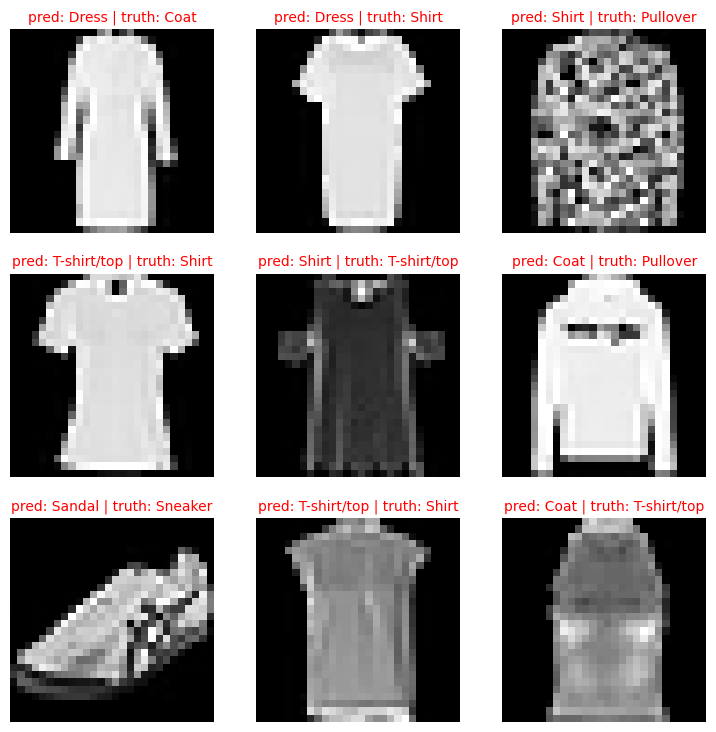

In [88]:
#exercise
#collect more preds
random.seed(42)
big_test_samples = []
big_test_labels = []
for sample, label in random.sample(list(test_data), k = 90):
  big_test_samples.append(sample)
  big_test_labels.append(label)

print(f"test sample img shape: {big_test_samples[0].shape}\n test samp label: {big_test_labels[0]}")
class_names[big_test_labels[0]]

big_pred_probs = make_predictions(model_2,
                                  big_test_samples)
big_pred_classes = big_pred_probs.argmax(dim = 1)

#only print wrong preds
plt.figure(figsize = (9,9))
nrows = 3
ncols = 3
images_shown = 0
for i, sample in enumerate(big_test_samples):

  big_pred_label = class_names[big_pred_classes[i]]
  big_truth_label = class_names[big_test_labels[i]]
  title_text = f"pred: {big_pred_label} | truth: {big_truth_label}"

  if big_pred_label != big_truth_label and images_shown <9:
    plt.subplot(nrows, ncols, images_shown+1)
    images_shown += 1

    plt.imshow(sample.squeeze(), cmap = 'gray')
    plt.title(title_text,fontsize = 10, c = 'r')

  plt.axis(False);

In [89]:
#it looks like most of the wrong predictions are pretty ambiguious. I think the model
#could be improved, but the data is pretty messy

In [90]:
from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents = True,      # create parent directories if needed
                 exist_ok = True)     # if models directory already exists, don't error

MODEL_NAME = '03_pytorch_computer_vision_model_2.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(),
           f = MODEL_SAVE_PATH)

saving model to models/03_pytorch_computer_vision_model_2.pth


In [91]:
#load in model
loaded_model_2 = FashionMNISTModelv2(input_shape = 1,
                                     hidden_units = 10,
                                     output_shape = 10)   #must have same shape as saved model

loaded_model_2.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

loaded_model_2 = loaded_model_2.to(device)

In [92]:
#eval loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model = loaded_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    acc_fn = acc_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelv2',
 'model_loss': 0.3178929388523102,
 'model_acc': 88.25878143310547}

In [93]:
model_2_results

{'model_name': 'FashionMNISTModelv2',
 'model_loss': 0.3178929388523102,
 'model_acc': 88.25878143310547}

In [94]:
#check if results are close to each other
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              atol = 1e-08 ,    #abs tolerance
              rtol = 0.0001     #relative tolerance
)

tensor(True)